In [138]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
# import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
# from textblob import TextBlob
# from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn import linear_model
# from sklearn.linear_model import LinearClassifier 
import numpy as np
from numpy import sign
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import train_test_split
# from transform_svm import transform_svm_dual
from itertools import cycle 
from sklearn.model_selection import StratifiedShuffleSplit

In [139]:
# Read the creditcard.csv file
data = pd.read_csv("creditcard.csv")

# Split the data into features and target
X = data.drop("Class", axis=1)
y = data["Class"]

In [140]:
X.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V20           V21           V22           V23  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  6.406204e-16  1.654067e-16 -3.568593e-16  2.578648e-16   
std    ...  7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01   
min    ... -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01   
25%    ... -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01   
50%    ... -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02   
75%    ...  1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01   
max    ...  3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01   

                V24           V25           V26           V27           V28  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.473266e-15  5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16   
std    6.056471e-01  5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01   
min   -2.836627e+00 -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01   
25%   -3.545861e-01 -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02   
50%    4.097606e-02  1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02   
75%    4.395266e-01  3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02   
max    4.584549e+00  7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   

              Amount  
count  284807.000000  
mean       88.349619  
std       250.120109  
min         0.000000  
25%         5.600000  
50%        22.000000  
75%        77.165000  
max     25691.160000  

[8 rows x 30 columns]

In [141]:
y.describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [142]:
data.plot(figsize=(60,150), subplots=True, xlabel='feature', ylabel='Values')

array([<AxesSubplot: xlabel='feature', ylabel='Values'>,
       <AxesSubplot: xlabel='feature', ylabel='Values'>,
       <AxesSubplot: xlabel='feature', ylabel='Values'>,
       <AxesSubplot: xlabel='feature', ylabel='Values'>,
       <AxesSubplot: xlabel='feature', ylabel='Values'>,
       <AxesSubplot: xlabel='feature', ylabel='Values'>,
       <AxesSubplot: xlabel='feature', ylabel='Values'>,
       <AxesSubplot: xlabel='feature', ylabel='Values'>,
       <AxesSubplot: xlabel='feature', ylabel='Values'>,
       <AxesSubplot: xlabel='feature', ylabel='Values'>,
       <AxesSubplot: xlabel='feature', ylabel='Values'>,
       <AxesSubplot: xlabel='feature', ylabel='Values'>,
       <AxesSubplot: xlabel='feature', ylabel='Values'>,
       <AxesSubplot: xlabel='feature', ylabel='Values'>,
       <AxesSubplot: xlabel='feature', ylabel='Values'>,
       <AxesSubplot: xlabel='feature', ylabel='Values'>,
       <AxesSubplot: xlabel='feature', ylabel='Values'>,
       <AxesSubplot: xlabel='fe

In [143]:
# Create a stratified shuffle split object
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data using the object
for train_index, test_index in strat_split.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((227845, 30), (227845,), (56962, 30), (56962,))

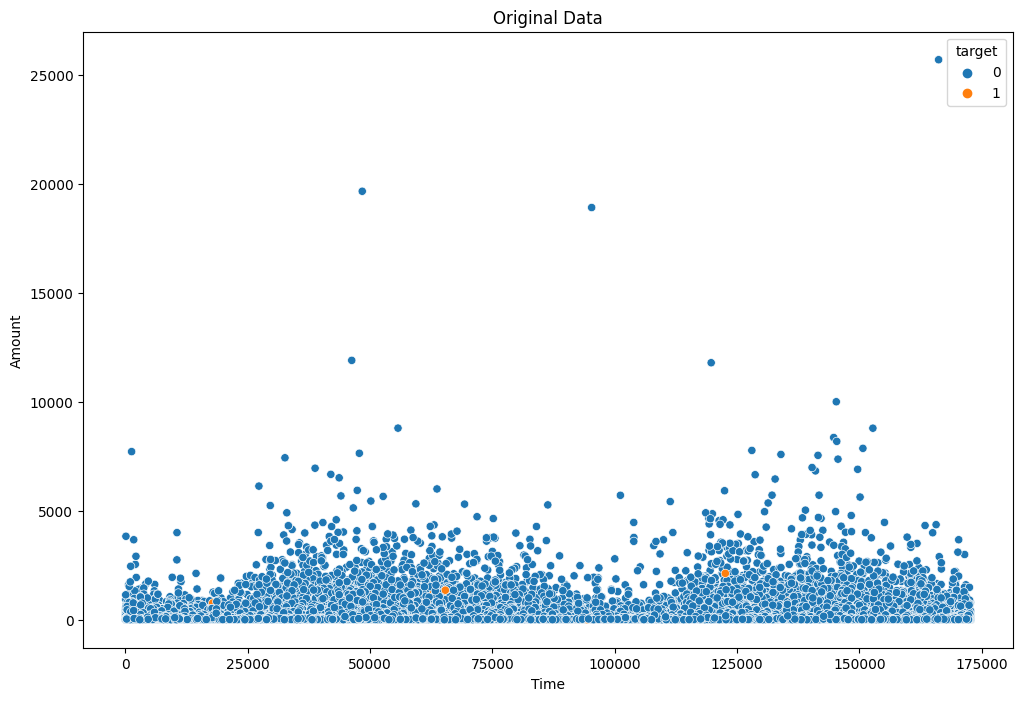

In [144]:
# Plotting data against time columns
# Convert x_train and y_train to numpy arrays
xtr = np.array(x_train)
ytr = np.array(y_train)
# Convert the data from numpy array to a pandas dataframe
getdf = pd.DataFrame({'Time': xtr[:, 0], 'Amount': xtr[:, 29], 'target': ytr})
# Plot the chart
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'Time', y = 'Amount', hue = 'target', data = getdf)
plt.title('Original Data')
plt.show()

Random Under Sampling

In [145]:
# Create an object of the RandomUnderSampler class
undersampler = RandomUnderSampler(sampling_strategy='auto')
# Fit and transform the training data
x_train, y_train = undersampler.fit_resample(x_train, y_train)

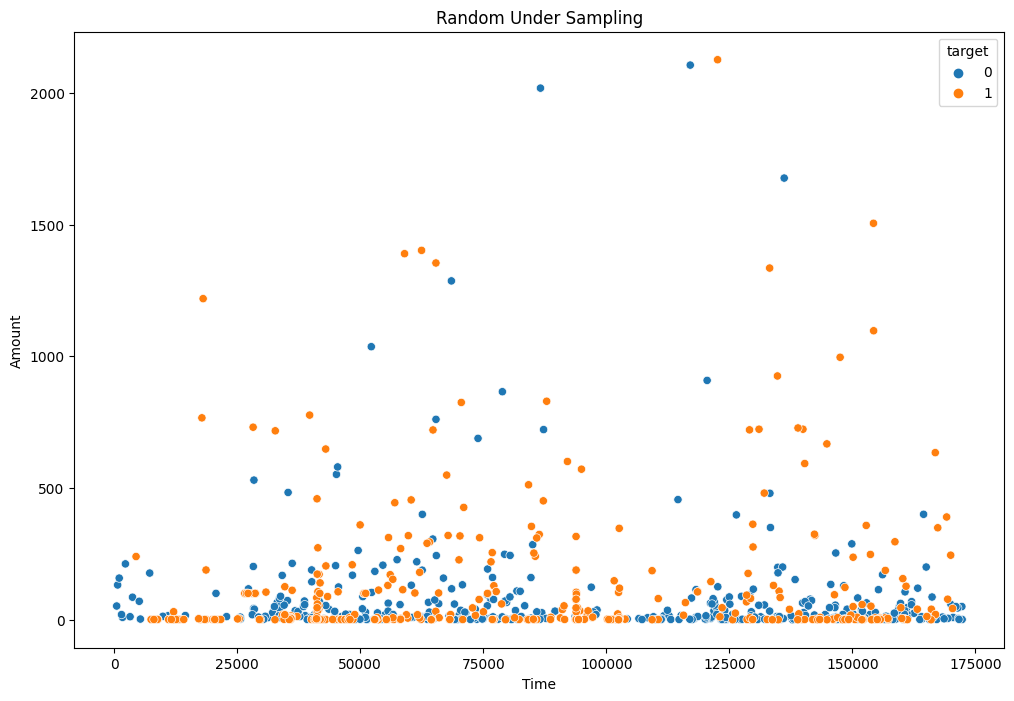

In [146]:
# Plotting data against time columns
# Convert x_train and y_train to numpy arrays
xtr = np.array(x_train)
ytr = np.array(y_train)
# Convert the data from numpy array to a pandas dataframe
getdf = pd.DataFrame({'Time': xtr[:, 0], 'Amount': xtr[:, 29], 'target': ytr})
# Plot the chart
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'Time', y = 'Amount', hue = 'target', data = getdf)
plt.title('Random Under Sampling')
plt.show()

Random Over Sampling

In [147]:
# Create an object of the RandomUnderSampler class
undersampler = RandomUnderSampler(sampling_strategy='auto')
# Fit and transform the training data
x_train, y_train = undersampler.fit_resample(x_train, y_train)

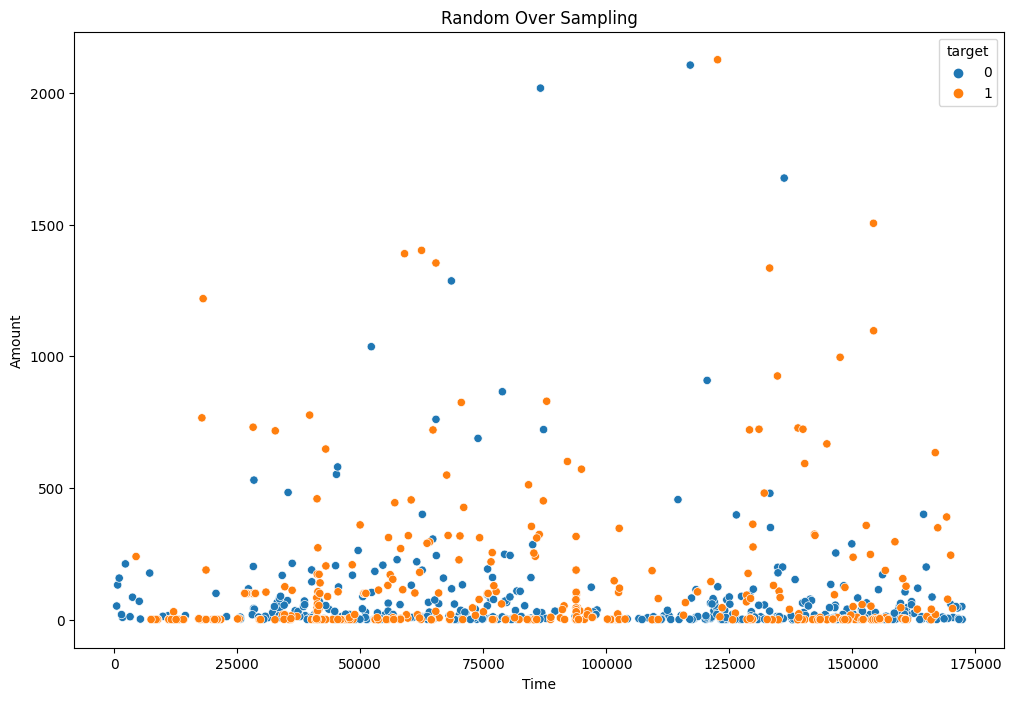

In [148]:
# Plotting data against time columns
# Convert x_train and y_train to numpy arrays
xtr = np.array(x_train)
ytr = np.array(y_train)
# Convert the data from numpy array to a pandas dataframe
getdf = pd.DataFrame({'Time': xtr[:, 0], 'Amount': xtr[:, 29], 'target': ytr})
# Plot the chart
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'Time', y = 'Amount', hue = 'target', data = getdf)
plt.title('Random Over Sampling')
plt.show()

Smote

In [149]:
undersampler = SMOTE(sampling_strategy='auto')
x_train, y_train = undersampler.fit_resample(x_train, y_train)

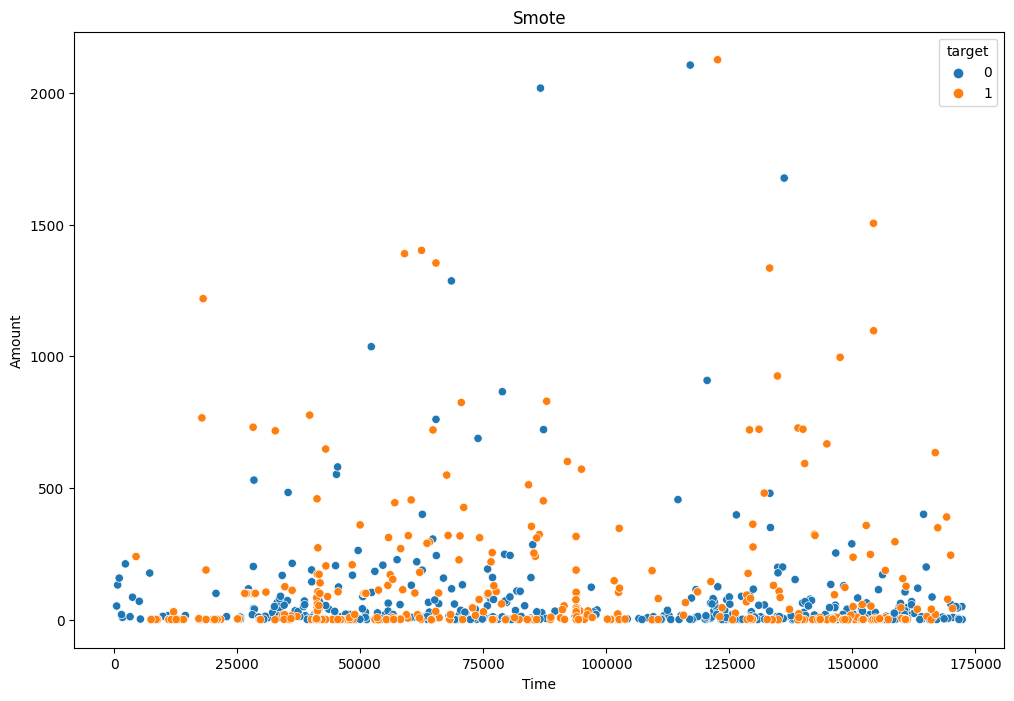

In [150]:
# Plotting data against time columns
# Convert x_train and y_train to numpy arrays
xtr = np.array(x_train)
ytr = np.array(y_train)
# Convert the data from numpy array to a pandas dataframe
getdf = pd.DataFrame({'Time': xtr[:, 0], 'Amount': xtr[:, 29], 'target': ytr})
# Plot the chart
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'Time', y = 'Amount', hue = 'target', data = getdf)
plt.title('Smote')
plt.show()

4. Implement the basic Pegasos Algorithm from the paper https://home.ttic.edu/~nati/Publications/
PegasosMPB.pdf. This is in page 5, Fig 1.

In [151]:
class SVMPegasos():
   def __init__(self, n_iter=100, lambda1=0.1):
      self.n_iter = n_iter
      self.lambda1 = lambda1

   def fit(self, X, Yn):
      X = np.array(X)
      m, n_features = X.shape[0], X.shape[1]
      self.w = np.zeros( n_features )
      for i in range(self.n_iter):
         eta = 1. / (self.lambda1*(i+1))
         j = np.random.choice(m, 1)[0]
         x, y = X[j], Yn[j]
         score = self.w.dot(x)
         if y*score < 1:
            self.w = (1 - eta*self.lambda1)*self.w + eta*y*x
         else:
            self.w = (1 - eta*self.lambda1)*self.w

   def predict(self, X):
      X = np.array(X)
      y_pred = np.sign(np.dot(X, self.w))
      return y_pred


In [152]:
# create an instance of the class
svm = SVMPegasos(10, 0.1)

# fit the model on your dataset
svm.fit(x_train, y_train)

# use the model to make predictions
y_pred = svm.predict(x_test)
print('Accuracy is: ',np.round(accuracy_score(y_test, y_pred)*100, 2), '%')

Accuracy is:  0.17 %


5. Implement the mini-batch Pegasos algorithm from the paper https://home.ttic.edu/~nati/Publications/
PegasosMPB.pdf. Do not forget the projection step. This is in page 6, Fig 2.

In [153]:
# Define the Pegasos solver
import numpy as np
def norm(x):
    """Calculate the l2 norm"""
    return np.sqrt(sum(x**2))

In [154]:
class miniBatchPegasos(object):
    """the Primal Estimated subgradient SOlver for Svm
    reference: Pegasos: Primal Estimated sub-GrAdient SOlver for SVM"""
    def __init__(self,ll=0.9,m=500,Ni=300,random_state=1):
        self.random_state = random_state
        self.Ni = Ni
        self.m = m # mini-batch size
        self.lambda1=ll
        
    def fit(self,X,y):
        N = len(y)
        X = np.hstack([X,np.ones((N,1))]) 
        rgen = np.random.RandomState(self.random_state)
        for i in range(self.Ni):
            if i ==0:
                theta_old = np.zeros((X.shape[1]))
            else:
                theta_old = theta_new1
            #print(theta_old)    
            n = i+1
            idx = rgen.randint(low=0,high=N,size=self.m)
            mu = 1/(self.lambda1*n)
            subgradiants = [yy*xx for yy,xx in zip(y[idx],X[idx,:]) if yy*theta_old.T.dot(xx)< 1]
            if len(subgradiants)==0:
                theta_new = theta_old*(1-mu*self.lambda1)
            else:
                theta_new = theta_old*(1-mu*self.lambda1) + mu*np.mean(subgradiants,axis=0)
                
            theta_new1 = np.min([1,1/(np.sqrt(self.lambda1)*norm(theta_new))])*theta_new # projection on B(0,1/sqrt(lambda))            
        self.theta = theta_new1
        
    def predict(self,X):
        N=X.shape[0]
        X = np.hstack([X,np.ones((N,1))]) 
        return np.array([np.where(x.dot(self.theta) > 0, 1,-1) for x in X])

In [155]:
# create an instance of the class
svm = miniBatchPegasos()

# fit the model on your dataset
svm.fit(x_train, y_train)

# use the model to make predictions
y_pred = svm.predict(x_test)
print('Accuracy is: ',np.round(accuracy_score(y_test, y_pred)*100, 2), '%')


Accuracy is:  0.17 %


6. Implement the dual coordinate descent method for SVM’s from the paper https://icml.cc/Conferences/
2008/papers/166.pdf. This is Algorithm 1 in the paper.

In [156]:
import numpy as np

class DualCoordinateDescentSVM():
    def __init__(self, C=1, tol=1e-3, max_iter=10):
        self.C = C
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, X, y):
        n_samples, n_features = X.shape
        K = np.dot(X, X.T)  # compute the kernel matrix
        alpha = np.zeros(n_samples)  # initialize alpha values
        b = 0  # initialize bias term
        L = 0  # initialize lower bound
        U = self.C  # initialize upper bound
        for t in range(self.max_iter):
            alpha_prev = np.copy(alpha)
            for i in range(n_samples):
                E_i = np.dot(alpha, K[i]) + b - y[i]
                if y[i] * E_i < -self.tol and alpha[i] < L:
                    alpha[i] = L
                elif y[i] * E_i > self.tol and alpha[i] > U:
                    alpha[i] = U
                else:
                    alpha[i] -= y[i] * E_i / K[i, i]
            b_prev = b
            b = (np.sum(y - np.dot(K.T, alpha)) / n_samples)
            if np.linalg.norm(alpha - alpha_prev) < self.tol:
                break
        self.alpha = alpha
        self.b = b
        self.w = np.dot(X.T, alpha * y)

    def predict(self, X):
        y_pred = np.sign(np.dot(X, self.w) + self.b)
        return y_pred


In [157]:
# create an instance of the class
svm = DualCoordinateDescentSVM()

# fit the model on your dataset
svm.fit(x_train, y_train)

# use the model to make predictions
y_pred = svm.predict(x_test)
print('Accuracy is: ',np.round(accuracy_score(y_test, y_pred)*100, 2), '%')

Accuracy is:  0.1 %
